Librerias

In [ ]:
import numpy as np
import math
import itertools

import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ejemplo de aplicación

Tomando el conjunto de datos como puntos en $\mathbb{R}^{3}$
\begin{align*}
  a &= \{0, 0, 0\}\\
  b &= \{0, 0, 0.5\}\\
  c &= \{0, 0.5, 0\}\\
  d &= \{0.3, 0.9, 0\}\\
  e &= \{0.9, 0.5, 0\}\\
  f &= \{0.5, 0, 0\}
\end{align*}
con un $\delta = 0.9$, notamos
\begin{align*}
  \Delta_0 &= \{a, b, c, d, e, f\}\\
  \Delta_1 &= \{(a, b), (a, c), (a, f), (b, c), (b, f),\\
  &\quad \ \ \ (c, d), (c, e), (c, f), (d, e), (e, f)\}\\
  \Delta_2 &= \{(a, b, c), (a, b, f), (a, c, f),\\
  &\quad \ \ \ (b, c, f), (c, d, e), (c, e, f)\}\\
  \Delta_3 &= \{(a, b, c, f)\}
\end{align*}

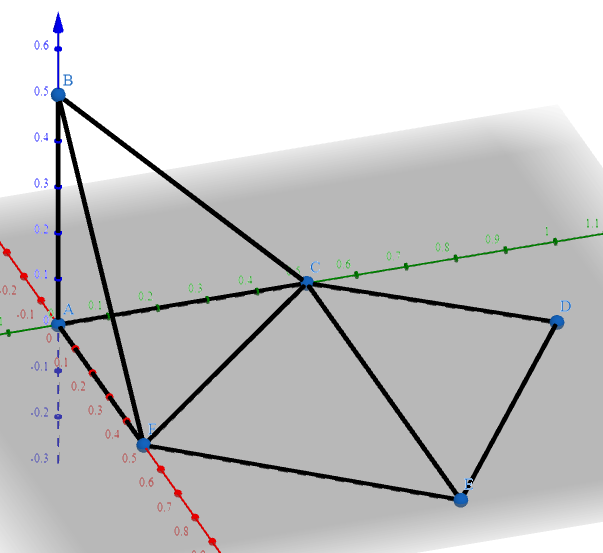

Ejemplo grafico con relleno

In [ ]:
#data = [[0, 0, 0], [0, 0, 0.5], [0, 0.5, 0], [0.3, 0.9, 0], [0.9, 0.5, 0], [0.5, 0, 0]]
x = [0, 0, 0]
y = [0, 0, 0.5]
z = [0, 0.5, 0]

fig = go.Figure(data=[
    go.Mesh3d(
        x=[0, 0, 0, 0.3, 0.9, 0.5],
        y=[0, 0, 0.5, 0.9, 0.5, 0],
        z=[0, 0.5, 0, 0, 0, 0],
        colorscale=[[0, 'gold'],
                    [0.5, 'mediumturquoise'],
                    [1, 'magenta']],
        # Intensity of each vertex, which will be interpolated and color-coded
        intensity = np.linspace(0, 1, 12, endpoint=True),
        intensitymode='cell',
        opacity=1,
        # i, j and k give the vertices of triangles
        # here we represent the 4 triangles of the tetrahedron surface
        i=[0, 0, 0, 1, 2, 2],
        j=[1, 1, 2, 2, 4, 3],
        k=[2, 5, 5, 5, 5, 4],
        showscale=True
    )
])

fig.show()

# Obtención de nube de datos

Creación clase punto donde es el $\Delta_{0}$, es decir, la mínima expresión

In [ ]:
class punto:
  def __init__(self, id, coordenadas):
    # ID de la clase, para hacer mas fácil la búsqueda en una lista
    self.id = id
    # Coordenadas de los puntos
    self.coordenadas = coordenadas
    # Aquí se guardaran las conexiones, lineas, caras, tetraedros, etc.
    self.Deltas = []

Método para hallar la distancia euclídea entre dos puntos, con cualquier cantidad de coordenadas

In [ ]:
def distancia_euclidea(punto_a, punto_b):
  if len(punto_a) != len(punto_b):
    print("Error en el tamaño de los puntos")
    return None
  
  suma = 0
  for i in range(len(punto_a)):
    suma += (punto_a[i] - punto_b[i])**2
  
  return math.sqrt(suma)

In [ ]:
def get_point_cloud(opcion):
  if opcion == 0:
    return 'klein_bottle_pointcloud_new_400.txt'
  elif opcion == 1:
    return 'klein_bottle_pointcloud_new_900.txt'

In [ ]:
url = 'https://raw.githubusercontent.com/n-otter/PH-roadmap/master/data_sets/roadmap_datasets_point_cloud/'
url += get_point_cloud(1)

# Guardarlos en una tabla
df = pd.read_csv(url, sep=" ", index_col=False, header=None, names=['x','y','z'])
# Convertir tabla a matriz
data = df.to_numpy()

# Idea a llegar

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['x'].values,
    y=df['y'].values,
    z=df['z'].values,
    mode='markers',
    marker=dict(
        size=5,
        color=df['z'].values,
        colorscale='rainbow',   # choose a colorscale
        opacity=0.8
    )
)])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#Código Python

Se convierten los datos para que no sean solo coordenadas, sino que ahora sean puntos de nuestra nueva clase

In [ ]:
# data = [[0, 0, 0], [0, 0, 0.5], [0, 0.5, 0], [0.3, 0.9, 0], [0.9, 0.5, 0], [0.5, 0, 0]]
puntos = []
for d in data:
  puntos.append(punto(len(puntos), d))

Encontramos los puntos cercanos y lo guardamos en el primer Delta de la clase, haciendo referencia a las lineas

In [ ]:
# Declaración del delta, es decir, distancia entre los puntos a medir
delta = 1

for punto in puntos:
  punto.Deltas.append(
      [p for p in puntos if 0 != distancia_euclidea(p.coordenadas, punto.coordenadas) <= delta]
  )

Transformamos nuestros vectores de datos en una tabla de puntos

In [ ]:
x, y, z = [[], [], []]
for punto in puntos:
  for p in punto.Deltas[0]:
    x += ([punto.coordenadas[0], p.coordenadas[0]])
    y += ([punto.coordenadas[1], p.coordenadas[1]])
    z += ([punto.coordenadas[2], p.coordenadas[2]])

D = {
    'x':x,
    'y':y, 
    'z':z
}

df = pd.DataFrame(data=D)

Graficamos

In [ ]:
fig = make_subplots(
    rows=1, 
    cols=2,
    specs=[
        [
          {'is_3d': True},
          {'is_3d': True}
        ],
    ],
    print_grid=False,
)

fig.append_trace(
    go.Scatter3d(
        x=df['x'].values, 
        y=df['y'].values, 
        z=df['z'].values,
        mode='lines', 
        line=dict(
            color='#0066FF',
            width=2
        ),
    ), 
    row=1, 
    col=1
)

fig.append_trace(
    go.Scatter3d(
        x=df['x'].values, 
        y=df['y'].values, 
        z=df['z'].values,
        marker=dict(
            size=4,
            color=df['z'].values,
            colorscale='rainbow',
        ),
        line=dict(
            color='black',
            width=0
        ),
    ), 
    row=1, 
    col=2
)

fig.update_layout(showlegend=False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Método general para hallar las caras, tetraedros y posteriores, a partir de las combinaciones posibles de las conexiones cercanas de un punto

In [ ]:
# Hacemos un ciclo de 2 (Delta_2, caras) al máximo valor de conexiones de un punto
for i in range(2, 3):
  # Consideramos solo los puntos con un número de conexiones mayor o igual a las necesarias
  puntos_aceptados = [punto for punto in puntos if len(punto.Deltas[0]) >= i]
  # Recorremos los puntos necesarios
  for punto in puntos_aceptados:
    # Lista donde guardar las combinaciones de conexiones del punto que permiten la creación de un Delta_i
    nuevo_elemento_delta_i = []
    # Consideramos todas las posibles combianciones de conexión de tamaño i, para ser comparadas con los otros puntos
    for subset in itertools.combinations([p for p in punto.Deltas[0] if p.id > punto.id], i):
      # Booleano que tiene en cuenta si uno de los puntos de conexión no cumple la continuidad
      sw = True
      # Recorremos la combinación de puntos creada
      for p in subset:
        # Recorremos la misma combinación pero junto con el punto de conexión en común
        for buscar in list(subset)+[punto]:
          # Omitimos revisar que el punto se contenga a si mismo
          if buscar == p:
            continue
          # Vemos si los otros puntos de la combinacitoria y el punto de conexión en común son conexión del punto de la combinatoria
          try: 
            puntos[p.id].Deltas[0].index(buscar) 
          except ValueError: 
            # Si el punto no se encuentra se termina el proceso de revisión de la combinatoria, ya que no hay continuidad
            sw = False
            break
          if not sw:
            break
      # Si hubo continuidad se guarda el Delta_i encontrado
      if sw:
        nuevo_elemento_delta_i.append(list(subset))
    # Guardamos todos los Delta_i encontrados en el Delta de la clase punto, para que sepa que pertenece a una nueva cara, tetraedro, etc.
    punto.Deltas.append(nuevo_elemento_delta_i)

Función para imprimir por consola los valores de las lineas, triangulos, tetraedors, etc.

In [ ]:
""" Algoritmo para mostrar los puntos que pertenecen a algún Delta 1 en especifico (0: lineas)
for p in puntos:
    print(p.id, ([i.id for i in p.Deltas[0]]))
"""

""" Algoritmo para mostrar los puntos que pertenecen a algún Delta i+1 en especifico (1: caras, 2: tetraedro, ...)
Delta = 4
for p in puntos:
  if len(p.Deltas) > Delta and len(p.Deltas[Delta]) != 0:
    print(p.id, ([list(map(lambda x : x.id, i)) for i in p.Deltas[Delta]]))
"""

' Algoritmo para mostrar los puntos que pertenecen a algún Delta i+1 en especifico (1: caras, 2: tetraedro, ...)\nDelta = 4\nfor p in puntos:\n  if len(p.Deltas) > Delta and len(p.Deltas[Delta]) != 0:\n    print(p.id, ([list(map(lambda x : x.id, i)) for i in p.Deltas[Delta]]))\n'

Obtencion de valores para las caras y grafico

In [ ]:
x, y, z = [[], [], []]
vertices = [[], [], []]
for punto in puntos:
  x += ([punto.coordenadas[0]])
  y += ([punto.coordenadas[1]])
  z += ([punto.coordenadas[2]])
  for p in punto.Deltas[1]:
    vertices[0] += [punto.id]
    vertices[1] += [p[0].id]
    vertices[2] += [p[1].id]

D = {
    'x':x,
    'y':y, 
    'z':z,
}

df_caras = pd.DataFrame(data=D)

In [ ]:
fig = make_subplots(
    rows=1, 
    cols=2,
    specs=[
        [
          {'is_3d': True},
          {'is_3d': True}
        ],
    ],
    print_grid=False,
)

fig.append_trace(
    go.Mesh3d(
        x=df['x'].values, 
        y=df['y'].values, 
        z=df['z'].values,
        color='blue',
        opacity=0.4,
    ), 
    row=1, 
    col=1
)

fig.append_trace(
    go.Mesh3d(
        x=df_caras['x'].values,
        y=df_caras['y'].values,
        z=df_caras['z'].values,
        intensity=z, 
        colorscale='Viridis',
        # i, j and k give the vertices of triangles
        # here we represent the 4 triangles of the tetrahedron surface
        i=vertices[0],
        j=vertices[1],
        k=vertices[2],
        showscale=False,
    ), 
    row=1, 
    col=2
)
fig.show()